# 热力图

## 1.热力图heatmap

seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt=’.2g’, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels=’auto’, yticklabels=’auto’, mask=None, ax=None, **kwargs)

- 热力图输入数据参数: 
    > data:矩阵数据集，可以是numpy的数组（array），也可以是pandas的DataFrame。如果是DataFrame，则df的index/column信息会分别对应到heatmap的columns和rows，即pt.index是热力图的行标，pt.columns是热力图的列标

- 热力图矩阵块颜色参数: 
    > vmax,vmin:分别是热力图的颜色取值最大和最小范围，默认是根据data数据表里的取值确定
    > cmap:从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表；改参数默认值：根据center参数设定 
    > center:数据表取值有差异时，设置热力图的色彩中心对齐值；通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变 
    > robust:默认取值False；如果是False，且没设定vmin和vmax的值，热力图的颜色映射范围根据具有鲁棒性的分位数设定，而不是用极值设定

- 热力图矩阵块注释参数: 
    > annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据 
    > fmt:字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字 
    annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体，matplotlib包text类下的字体设置

- 热力图矩阵块之间间隔及间隔线参数： 
    > linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小 
    > linecolor:切分热力图上每个矩阵小块的线的颜色，默认值是’white’

- 热力图颜色刻度条参数： 
    > cbar:是否在热力图侧边绘制颜色刻度条，默认值是True 
    > cbar_kws:热力图侧边绘制颜色刻度条时，相关字体设置，默认值是None 
    > cbar_ax:热力图侧边绘制颜色刻度条时，刻度条位置设置，默认值是None

- square:设置热力图矩阵小块形状，默认值是False 
    xticklabels, yticklabels:
    > xticklabels控制每列标签名的输出；
    > yticklabels控制每行标签名的输出。默认值是auto。
        如果是True，则以DataFrame的列名作为标签名。如果是False，则不添加行标签名。
        如果是列表，则标签名改为列表中给的内容。如果是整数K，则在图上每隔K个标签进行一次标注。 
        如果是auto，则自动选择标签的标注间距，将标签名不重叠的部分(或全部)输出 
    > mask:控制某个矩阵块是否显示出来。默认值是None。如果是布尔型的DataFrame，则将DataFrame里True的位置用白色覆盖掉 
    > ax:设置作图的坐标轴，一般画多个子图时需要修改不同的子图的该值 
**kwargs:All other keyword arguments are passed to ax.pcolormesh


Text(249,0.5,'kind')

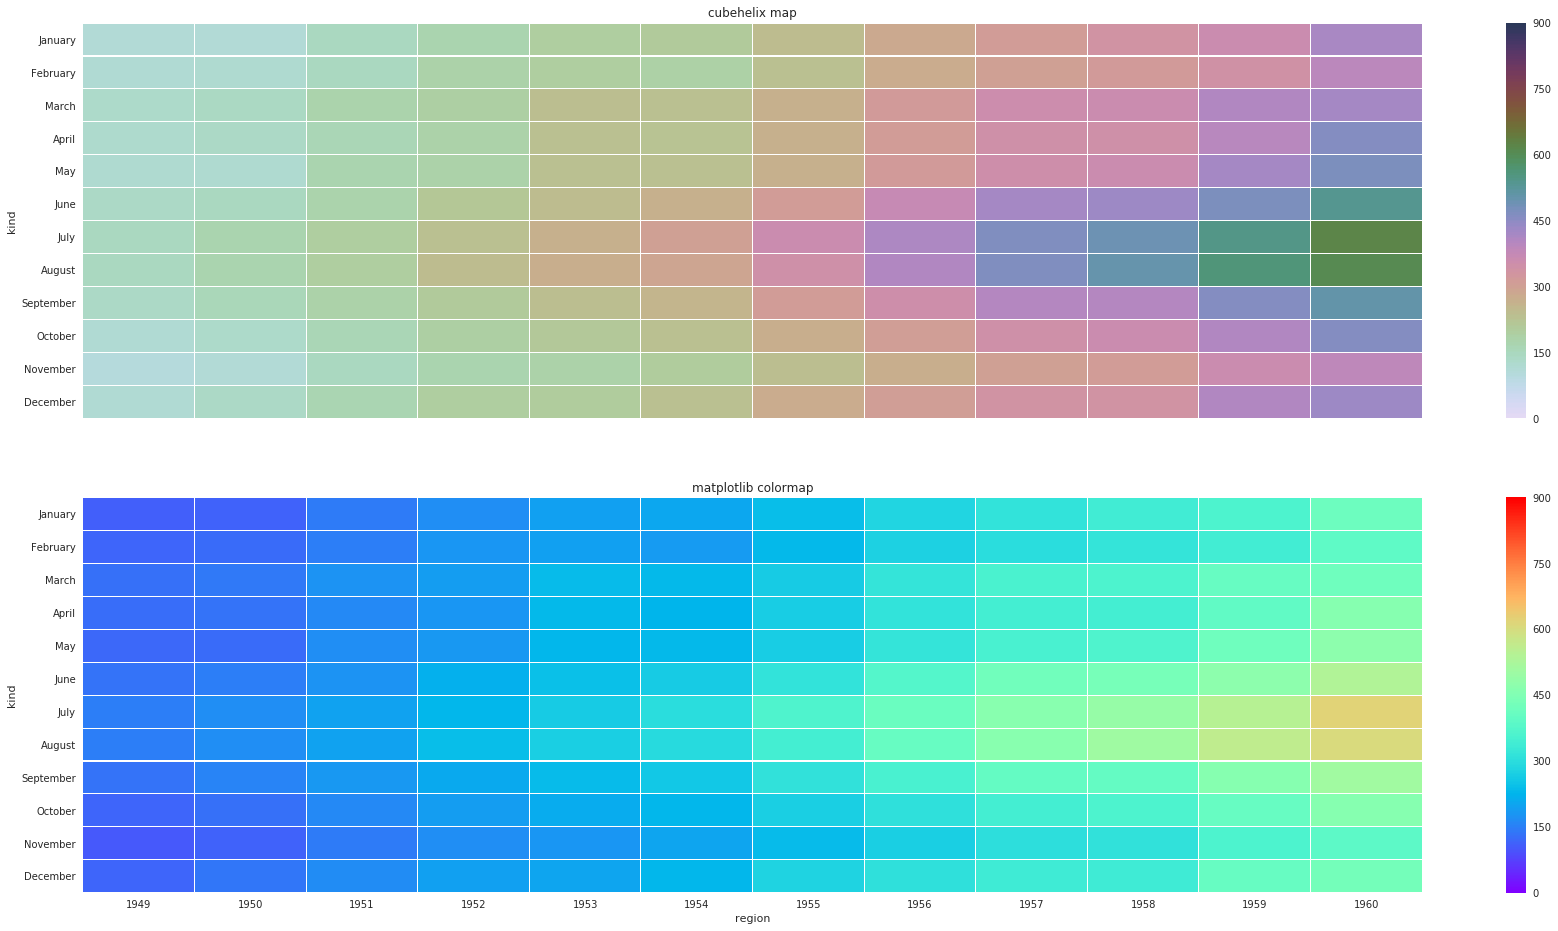

In [6]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

f, (ax1,ax2) = plt.subplots(figsize = (30,16),nrows=2)

# cmap用cubehelix map颜色
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(flights, linewidths = 0.05, ax = ax1, vmax=900, vmin=0, cmap=cmap)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')


# cmap用matplotlib colormap
# vmin=0, vmax=1 改变颜色映射的值范围
sns.heatmap(flights, linewidths = 0.05, ax = ax2, vmax=900, vmin=0, cmap='rainbow')
# rainbow为 matplotlib 的colormap名称
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

# 热力图矩阵块注释参数

- annot(矩阵上数字),annot_kws(矩阵上数字的大小颜色字体)matplotlib包text类下的字体设置
- fmt(字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字)

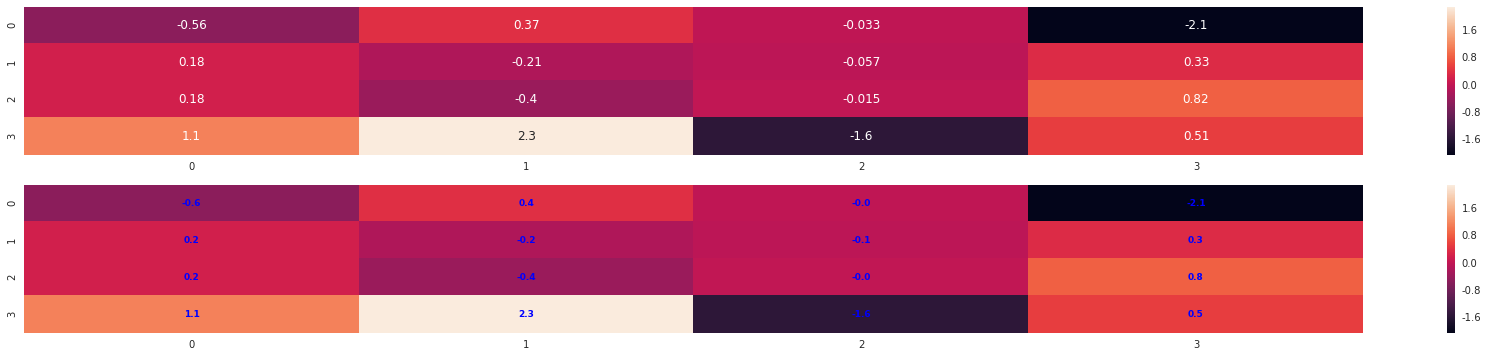

In [9]:
np.random.seed(20180316)
x = np.random.randn(4, 4)

f, (ax1, ax2) = plt.subplots(figsize=(30,6),nrows=2)

sns.heatmap(x, annot=True, ax=ax1)

sns.heatmap(x, annot=True, ax=ax2, annot_kws={'size':9,'weight':'bold', 'color':'blue'},fmt='.1f')

# mask突出显示某些数据
- mask对某些矩阵块的显示进行覆盖
- xticklabels，yticklabels横轴和纵轴的标签名输出

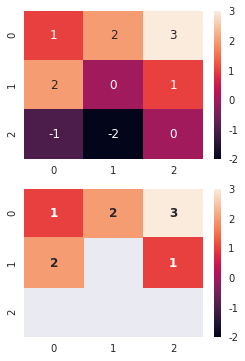

In [10]:
f,(ax1,ax2) = plt.subplots(figsize=(4,6),nrows=2)
x = np.array([[1,2,3],[2,0,1],[-1,-2,0]])
sns.heatmap(x, annot=True, ax=ax1)
sns.heatmap(x, ax=ax2, annot=True, annot_kws={"weight": "bold"}, mask=x < 1)   #把小于1的区域覆盖掉

Text(0.5,429.974,'region')

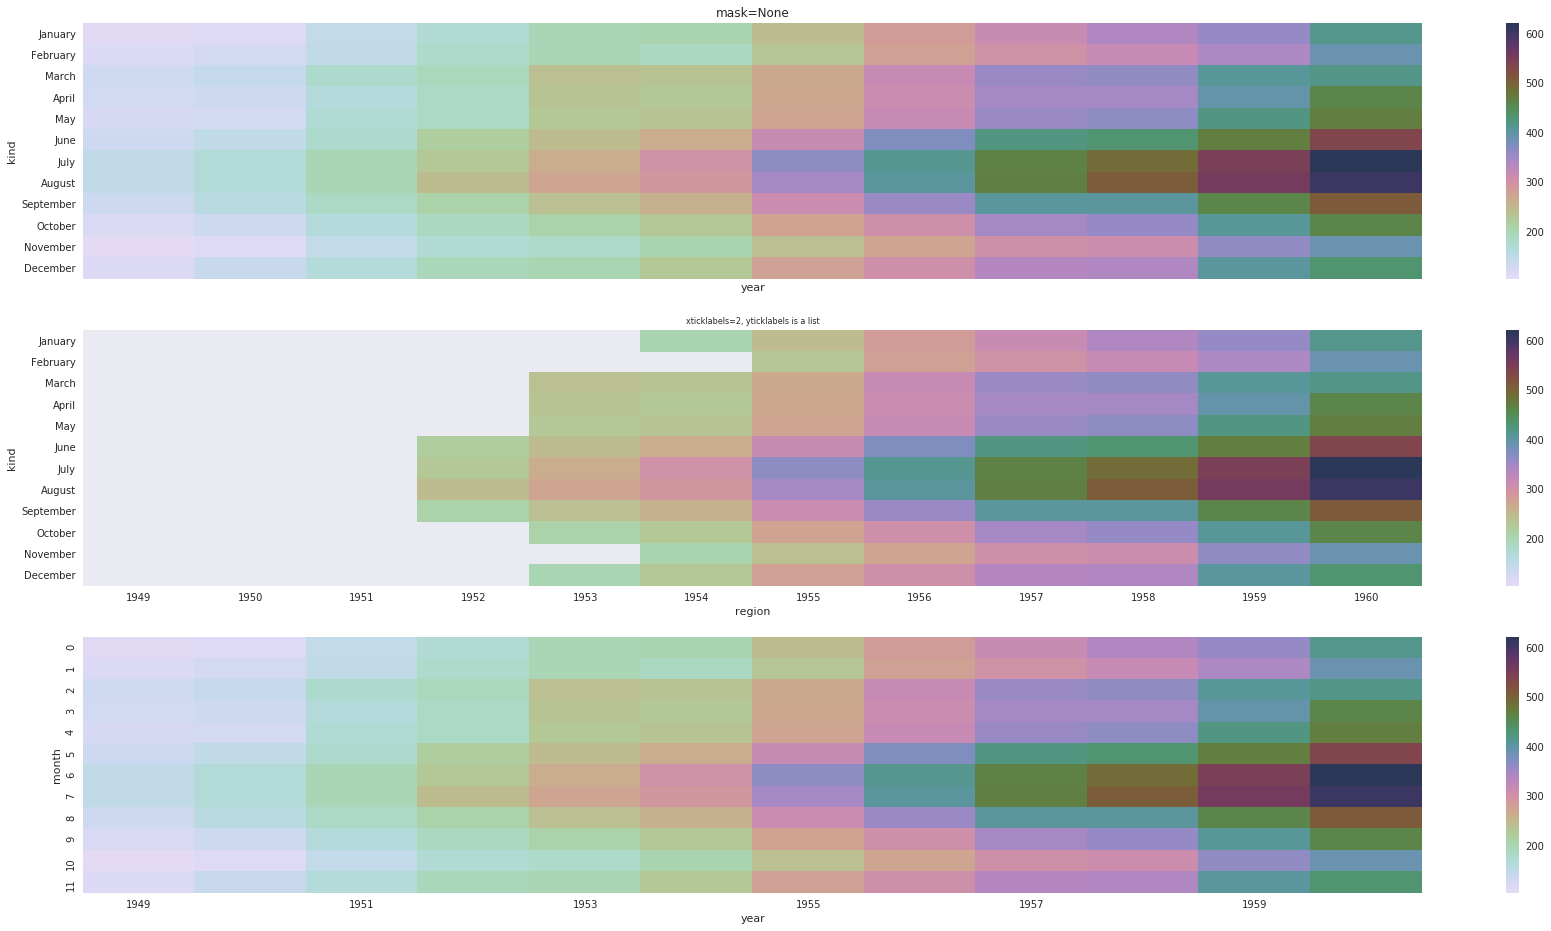

In [19]:

f, (ax1,ax2, ax3) = plt.subplots(figsize = (30,16),nrows=3)
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

p1 = sns.heatmap(flights, ax=ax1, cmap=cmap, xticklabels=False, mask=None)
ax1.set_title('mask=None')
ax1.set_ylabel('kind')

#mask对flights进行布尔型转化,结果为True的位置用白色覆盖
p2 = sns.heatmap(flights, ax=ax2, cmap=cmap, xticklabels=True, mask=(flights<200))
ax2.set_title('mask: boolean DataFrame')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

p2 = sns.heatmap(flights, ax=ax3, cmap=cmap, center=None, xticklabels=2, yticklabels=list(range(12)))   # xticklabels=2隔两个给一个标签
ax2.set_title('xticklabels=2, yticklabels is a list',fontsize=8)
ax2.set_xlabel('region')

# 相关系数

In [ ]:
fig = plt.figure(figsize=(36, 16))
ax1 = fig.add_subplot(211)
pk_jibie_lizhi_corr = pk_jibie_lizhi.iloc[:, 5:-5].corr() # 相关系数
sns.heatmap(pk_jibie_lizhi_corr)
ax1.set_title('corr')